In [22]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import ast

In [23]:
DATASET_PATH = "dataset/MovieSummaries/"
MOVIES = DATASET_PATH + "movie.metadata.tsv"
MOVIES_SUMMARIES = DATASET_PATH + "plot_summaries.txt"
MOVIES_CHARACTER = DATASET_PATH + "character.metadata.tsv"
COST_OF_LIVING = "dataset/cost-of-living_v2.csv"
WORL_POPULATION = "dataset/world_population.csv"

df_cost_of_living = pd.read_csv(COST_OF_LIVING)
df_world_population = pd.read_csv(WORL_POPULATION)

df_movies = pd.read_csv(MOVIES, sep="\t", header=None)
df_movies.columns = [
        "Wikipedia_movie_ID", 
        "Freebase_movie_ID", 
        "Movie_name", 
        "Movie_release_date", 
        "Box_office_revenue", 
        "Runtime", 
        "Languages", 
        "Countries", 
        "Genres"
    ]

df_summaries = pd.read_csv(MOVIES_SUMMARIES, sep="\t", header=None)
df_summaries.columns = [
        "Wikipedia_movie_ID", 
        "Plot_summary"
    ]

df_character = pd.read_csv(MOVIES_CHARACTER, sep="\t", header=None)
df_character.columns = [
        "Wikipedia_movie_ID", 
        "Freebase_movie_ID", 
        "Movie_release_date", 
        "Character_name", 
        "Actor_dob", 
        "Actor_gender", 
        "Actor_height", 
        "Actor_ethnicity", 
        "Actor_name", 
        "Actor_age_at_release", 
        "Freebase_char_actor_map_ID", 
        "Freebase_character_ID", 
        "Freebase_actor_ID"
    ]

# check the data we loaded
df_movies.head(5)

,Wikipedia_movie_ID,Freebase_movie_ID,Movie_name,Movie_release_date,Box_office_revenue,Runtime,Languages,Countries,Genres
0,975900,/m/03vyhn,Ghosts of Mars,2001-08-24,14010832.0,98.0,"{""/m/02h40lc"": ""English Language""}","{""/m/09c7w0"": ""United States of America""}","{""/m/01jfsb"": ""Thriller"", ""/m/06n90"": ""Science..."
1,3196793,/m/08yl5d,Getting Away with Murder: The JonBenét Ramsey ...,2000-02-16,NaN,95.0,"{""/m/02h40lc"": ""English Language""}","{""/m/09c7w0"": ""United States of America""}","{""/m/02n4kr"": ""Mystery"", ""/m/03bxz7"": ""Biograp..."
2,28463795,/m/0crgdbh,Brun bitter,1988,NaN,83.0,"{""/m/05f_3"": ""Norwegian Language""}","{""/m/05b4w"": ""Norway""}","{""/m/0lsxr"": ""Crime Fiction"", ""/m/07s9rl0"": ""D..."
3,9363483,/m/0285_cd,White Of The Eye,1987,NaN,110.0,"{""/m/02h40lc"": ""English Language""}","{""/m/07ssc"": ""United Kingdom""}","{""/m/01jfsb"": ""Thriller"", ""/m/0glj9q"": ""Erotic..."
4,261236,/m/01mrr1,A Woman in Flames,1983,NaN,106.0,"{""/m/04306rv"": ""German Language""}","{""/m/0345h"": ""Germany""}","{""/m/07s9rl0"": ""Drama""}"


In [24]:
# Size of the data
print(f"Size of df_movies: {df_movies.shape}")
print(f"Size of df_summaries: {df_summaries.shape}")
print(f"Size of df_character: {df_character.shape}")

Size of df_movies: (81741, 9)
Size of df_summaries: (42303, 2)
Size of df_character: (450669, 13)


In [25]:
# Find the intersection of movie IDs in both datasets
common_movies = df_movies["Wikipedia_movie_ID"].isin(df_summaries["Wikipedia_movie_ID"]).sum()

print(f"Number of movies in df_movies that are also in df_summaries: {common_movies}\n")
print(f"This represents {round(common_movies/df_movies.shape[0] * 100, 2)}% of df_movies and {round(common_movies/df_summaries.shape[0] * 100, 2)}% of df_summaries")

Number of movies in df_movies that are also in df_summaries: 42204

This represents 51.63% of df_movies and 99.77% of df_summaries


In [26]:
# Check for missing values
print("Missing values in df_movies:\n", df_movies.isna().sum(), "\n")
print("Missing values in df_summaries:\n", df_summaries.isna().sum(), "\n")
print("Missing values in df_character:\n", df_character.isna().sum(), "\n")

Missing values in df_movies:
 Wikipedia_movie_ID        0
Freebase_movie_ID         0
Movie_name                0
Movie_release_date     6902
Box_office_revenue    73340
Runtime               20450
Languages                 0
Countries                 0
Genres                    0
dtype: int64 

Missing values in df_summaries:
 Wikipedia_movie_ID    0
Plot_summary          0
dtype: int64 

Missing values in df_character:
 Wikipedia_movie_ID                 0
Freebase_movie_ID                  0
Movie_release_date              9995
Character_name                257875
Actor_dob                     106145
Actor_gender                   45609
Actor_height                  295845
Actor_ethnicity               344611
Actor_name                      1228
Actor_age_at_release          158113
Freebase_char_actor_map_ID         0
Freebase_character_ID         257865
Freebase_actor_ID                815
dtype: int64 



In [27]:
# Changing some columns to list to yeet the identifiant
def dictionary_string_to_list(input):
    res = []
    for value in (ast.literal_eval(input)).values():
        res += [value]
    return res


df_movies["Genres"] = df_movies["Genres"].apply(dictionary_string_to_list)
df_movies["Countries"] = df_movies["Countries"].apply(dictionary_string_to_list)
df_movies["Languages"] = df_movies["Languages"].apply(dictionary_string_to_list)

In [28]:
df_movies.head(5)

,Wikipedia_movie_ID,Freebase_movie_ID,Movie_name,Movie_release_date,Box_office_revenue,Runtime,Languages,Countries,Genres
0,975900,/m/03vyhn,Ghosts of Mars,2001-08-24,14010832.0,98.0,[English Language],[United States of America],"[Thriller, Science Fiction, Horror, Adventure,..."
1,3196793,/m/08yl5d,Getting Away with Murder: The JonBenét Ramsey ...,2000-02-16,NaN,95.0,[English Language],[United States of America],"[Mystery, Biographical film, Drama, Crime Drama]"
2,28463795,/m/0crgdbh,Brun bitter,1988,NaN,83.0,[Norwegian Language],[Norway],"[Crime Fiction, Drama]"
3,9363483,/m/0285_cd,White Of The Eye,1987,NaN,110.0,[English Language],[United Kingdom],"[Thriller, Erotic thriller, Psychological thri..."
4,261236,/m/01mrr1,A Woman in Flames,1983,NaN,106.0,[German Language],[Germany],[Drama]


In [29]:
# Calculate ratio of multiple contry film
films_with_multiple_countries = df_movies['Countries'].apply(lambda x: len(x) > 1 if isinstance(x, list) else False).sum()

total_films = len(df_movies)
percentage_multiple_countries = (films_with_multiple_countries / total_films) * 100
print(f"Percentage of films with multiple countries: {percentage_multiple_countries:.2f}%")

Percentage of films with multiple countries: 11.28%


In [30]:
#df_movies_test=df_movies.copy(deep=True)

#delete those movies
df_movies = df_movies[df_movies['Countries'].apply(lambda x: len(x)==1)]
df_movies.head(5)

,Wikipedia_movie_ID,Freebase_movie_ID,Movie_name,Movie_release_date,Box_office_revenue,Runtime,Languages,Countries,Genres
0,975900,/m/03vyhn,Ghosts of Mars,2001-08-24,14010832.0,98.0,[English Language],[United States of America],"[Thriller, Science Fiction, Horror, Adventure,..."
1,3196793,/m/08yl5d,Getting Away with Murder: The JonBenét Ramsey ...,2000-02-16,NaN,95.0,[English Language],[United States of America],"[Mystery, Biographical film, Drama, Crime Drama]"
2,28463795,/m/0crgdbh,Brun bitter,1988,NaN,83.0,[Norwegian Language],[Norway],"[Crime Fiction, Drama]"
3,9363483,/m/0285_cd,White Of The Eye,1987,NaN,110.0,[English Language],[United Kingdom],"[Thriller, Erotic thriller, Psychological thri..."
4,261236,/m/01mrr1,A Woman in Flames,1983,NaN,106.0,[German Language],[Germany],[Drama]


In [31]:
# Convert the single element in the list for country to a string
df_movies['Countries'] = df_movies['Countries'].apply(lambda x: str(x[0]))
df_movies.head(5)

,Wikipedia_movie_ID,Freebase_movie_ID,Movie_name,Movie_release_date,Box_office_revenue,Runtime,Languages,Countries,Genres
0,975900,/m/03vyhn,Ghosts of Mars,2001-08-24,14010832.0,98.0,[English Language],United States of America,"[Thriller, Science Fiction, Horror, Adventure,..."
1,3196793,/m/08yl5d,Getting Away with Murder: The JonBenét Ramsey ...,2000-02-16,NaN,95.0,[English Language],United States of America,"[Mystery, Biographical film, Drama, Crime Drama]"
2,28463795,/m/0crgdbh,Brun bitter,1988,NaN,83.0,[Norwegian Language],Norway,"[Crime Fiction, Drama]"
3,9363483,/m/0285_cd,White Of The Eye,1987,NaN,110.0,[English Language],United Kingdom,"[Thriller, Erotic thriller, Psychological thri..."
4,261236,/m/01mrr1,A Woman in Flames,1983,NaN,106.0,[German Language],Germany,[Drama]


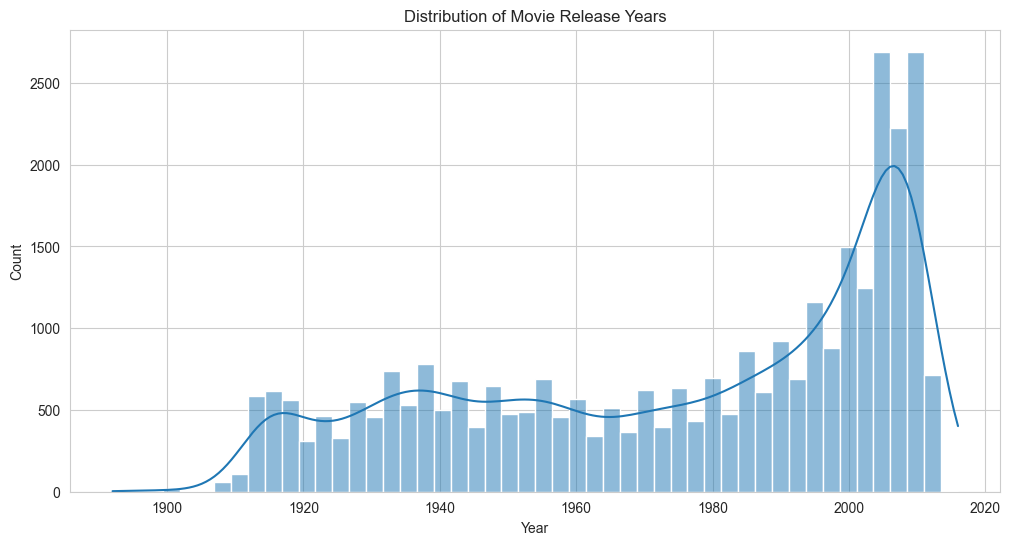

In [32]:
# Analyze distribution of movie release dates
df_movies["Movie_release_date"] = pd.to_datetime(df_movies["Movie_release_date"], errors="coerce")
df_movies["Year"] = df_movies["Movie_release_date"].dt.year
plt.figure(figsize=(12, 6))
sns.histplot(df_movies["Year"].dropna(), bins=50, kde=True)
plt.title("Distribution of Movie Release Years")
plt.xlabel("Year")
plt.show()

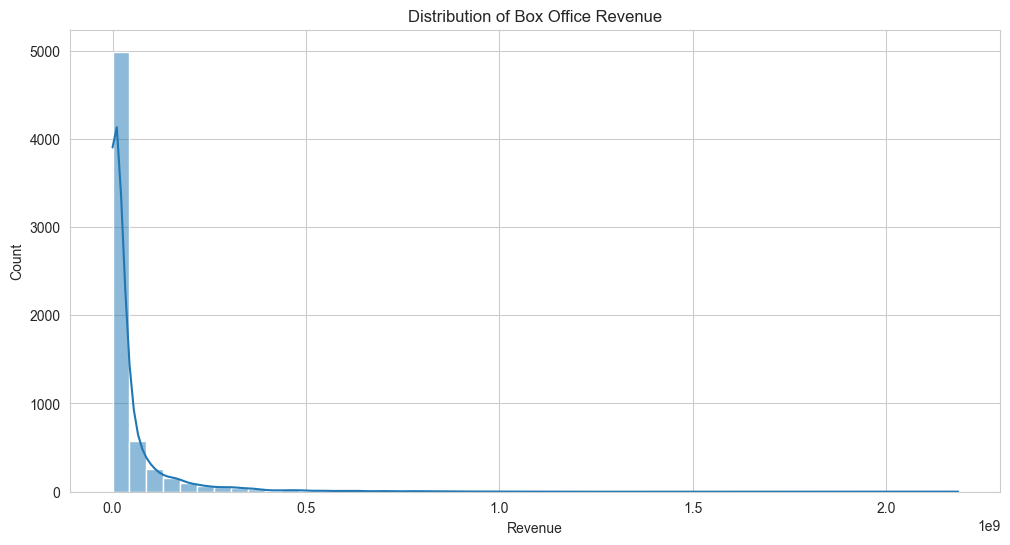

In [33]:
# Analyze distribution of box office revenue
plt.figure(figsize=(12, 6))
sns.histplot(df_movies["Box_office_revenue"].dropna(), bins=50, kde=True)
plt.title("Distribution of Box Office Revenue")
plt.xlabel("Revenue")
plt.show()

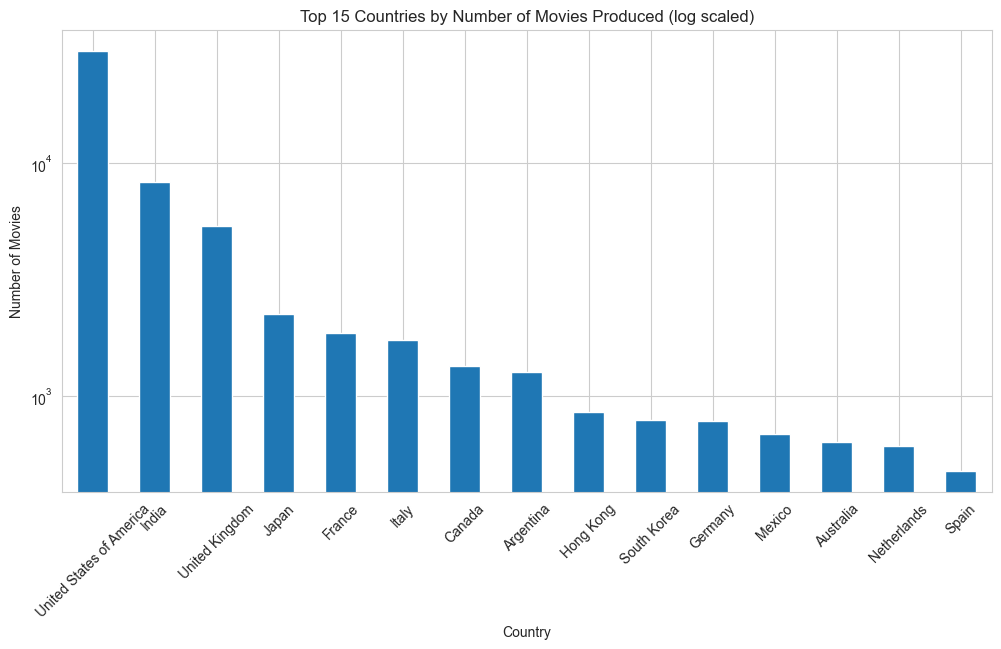

In [34]:
# Getting and plotting the top 15 countries by movies produced
df_movies['Countries'] = df_movies['Countries'].fillna('Unknown')
df_movies['Countries'] = df_movies['Countries'].str.split(', ')

df_movies_exploded = df_movies.explode('Countries')

countries_count = df_movies_exploded['Countries'].value_counts().head(15)

plt.figure(figsize=(12, 6))
countries_count.plot(kind='bar')
plt.title('Top 15 Countries by Number of Movies Produced (log scaled)')
plt.yscale('log')
plt.xlabel('Country')
plt.ylabel('Number of Movies')
plt.xticks(rotation=45)
plt.show()

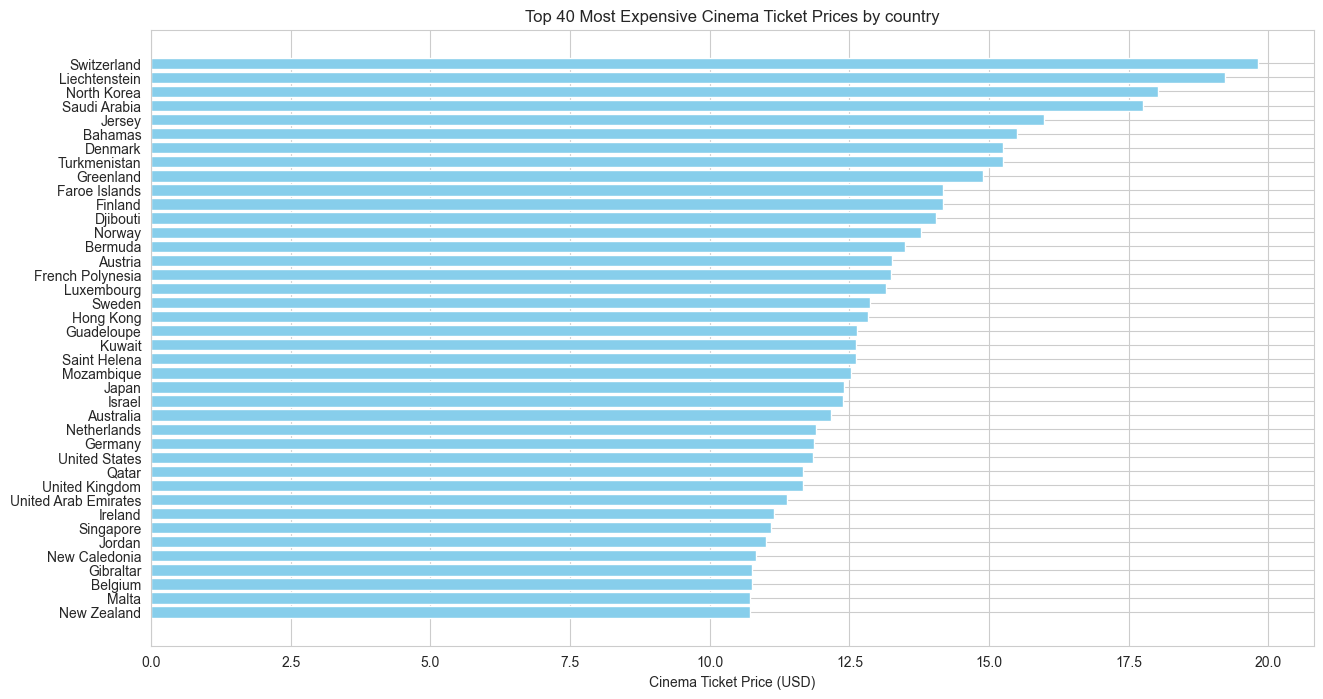

In [35]:
# getting and plotting the average cinema ticket price for the 40 most expensive countries
df_cinema = df_cost_of_living[['country', 'x41']]
df_cinema.columns = ['country', 'ticket_price']

df_cinema.loc[:, 'ticket_price'] = pd.to_numeric(df_cinema['ticket_price'], errors='coerce')
df_cinema = df_cinema.dropna(subset=['ticket_price'])
df_cinema = df_cinema.groupby('country', as_index=False).mean()

df_top_40 = df_cinema.sort_values(by='ticket_price', ascending=False).head(40)

plt.figure(figsize=(15, 8))
plt.barh(df_top_40['country'], df_top_40['ticket_price'], color='skyblue')
plt.xlabel('Cinema Ticket Price (USD)')
plt.title('Top 40 Most Expensive Cinema Ticket Prices by country')
plt.gca().invert_yaxis()  # Invert y-axis to show the most expensive at the top
plt.show()


In [36]:
# We select some interesting countries
countries = ['United States', 'United States of America', 'Canada', 'Italy', 'United Kingdom', 'France', 'Australia', 'Japan', 'China', 'India', 'South Korea', 'Nigeria', 'Argentina', 'Kenya']

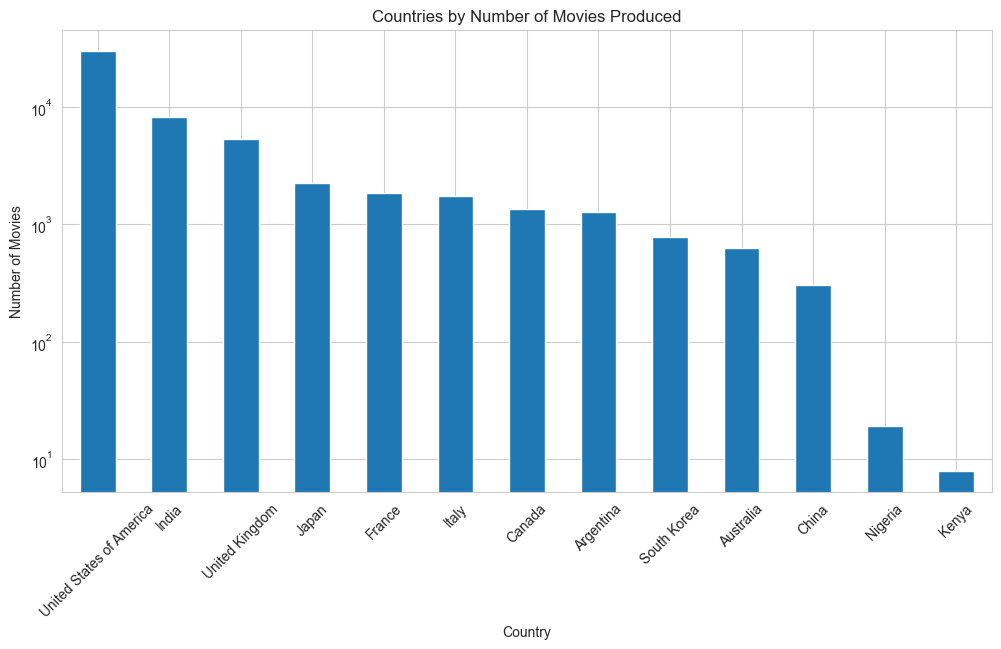

In [37]:
# We check the number of movies produced for our selected countries
df_movies_exploded = df_movies_exploded[df_movies_exploded['Countries'].isin(countries)]

countries_count = df_movies_exploded['Countries'].value_counts()

plt.figure(figsize=(12, 6))
countries_count.plot(kind='bar')
plt.title('Countries by Number of Movies Produced')
plt.yscale('log')
plt.xlabel('Country')
plt.ylabel('Number of Movies')
plt.xticks(rotation=45)
plt.show()

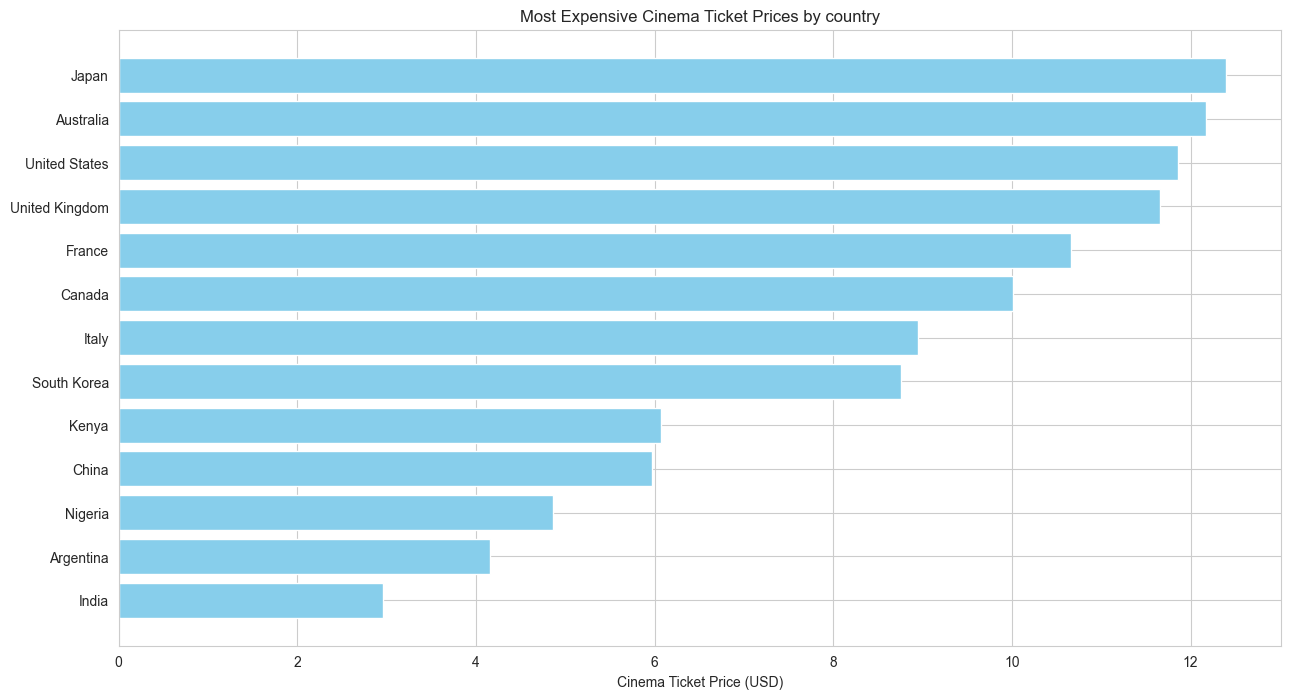

In [38]:
# Check the cinema ticket prices for our selected countries
df_cinema = df_cinema[df_cinema['country'].isin(countries)]
df_cinema = df_cinema.sort_values(by='ticket_price', ascending=False)

plt.figure(figsize=(15, 8))
plt.barh(df_cinema['country'], df_cinema['ticket_price'], color='skyblue')
plt.xlabel('Cinema Ticket Price (USD)')
plt.title('Most Expensive Cinema Ticket Prices by country')
plt.gca().invert_yaxis() 
plt.show()

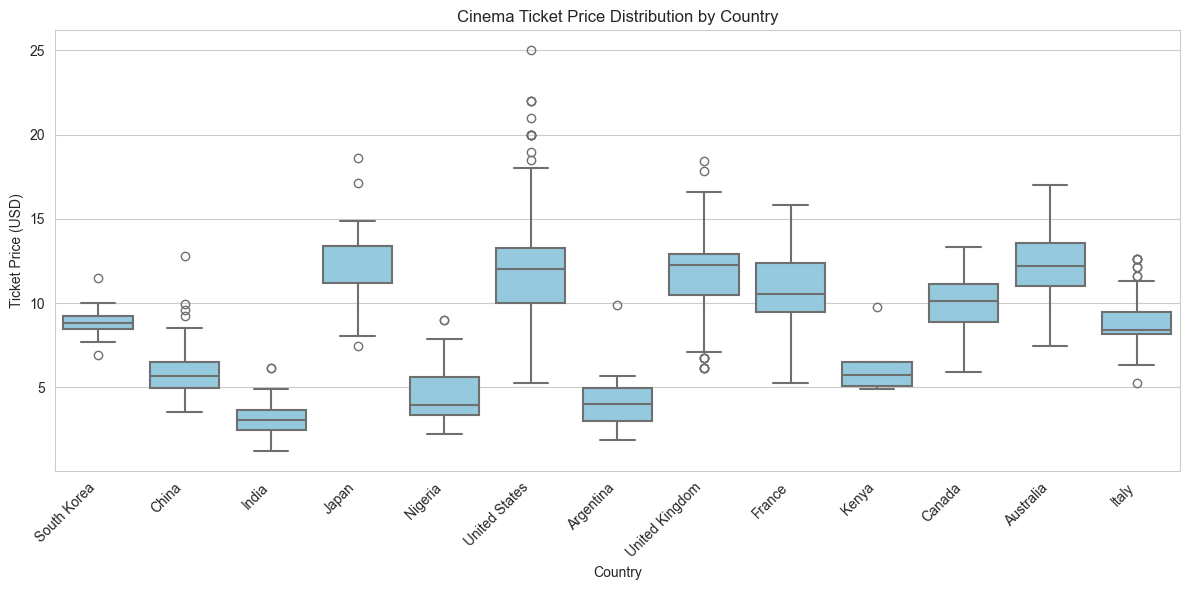

In [39]:
# Check the cinema ticket prices for our selected countries via boxplot
df_cinema = df_cost_of_living[['country', 'x41']]
df_cinema.columns = ['country', 'ticket_price']
df_cinema = df_cinema[df_cinema['country'].isin(countries)]

plt.figure(figsize=(12, 6))
sns.boxplot(data=df_cinema, x="country", y="ticket_price", color="skyblue", linewidth=1.5)
plt.title('Cinema Ticket Price Distribution by Country')
plt.xlabel('Country')
plt.ylabel('Ticket Price (USD)')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

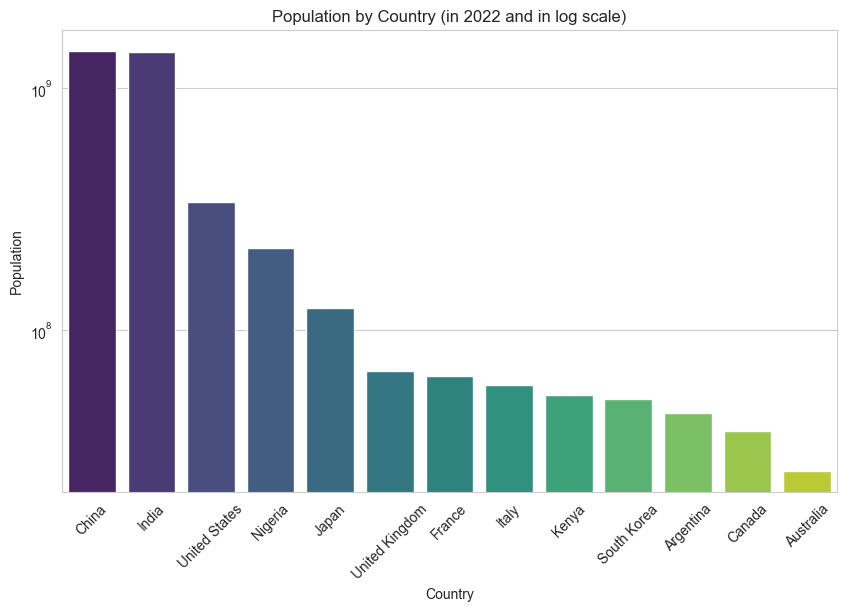

In [40]:
# Check population for our selected countries
df_preprocessed = df_world_population[["Country/Territory", "2022 Population"]]
df_preprocessed.columns = ["countries", "population"]

df_countries = df_preprocessed[df_preprocessed["countries"].isin(countries)]
df_countries = df_countries.sort_values(by="population", ascending=False)

sns.set_style("whitegrid")
plt.figure(figsize=(10, 6))
sns.barplot(x="countries", y="population", data=df_countries, hue="countries", palette="viridis", dodge=False, legend=False)
plt.title("Population by Country (in 2022 and in log scale)")
plt.yscale("log")
plt.xlabel("Country")
plt.ylabel("Population")
plt.xticks(rotation=45)
plt.show()

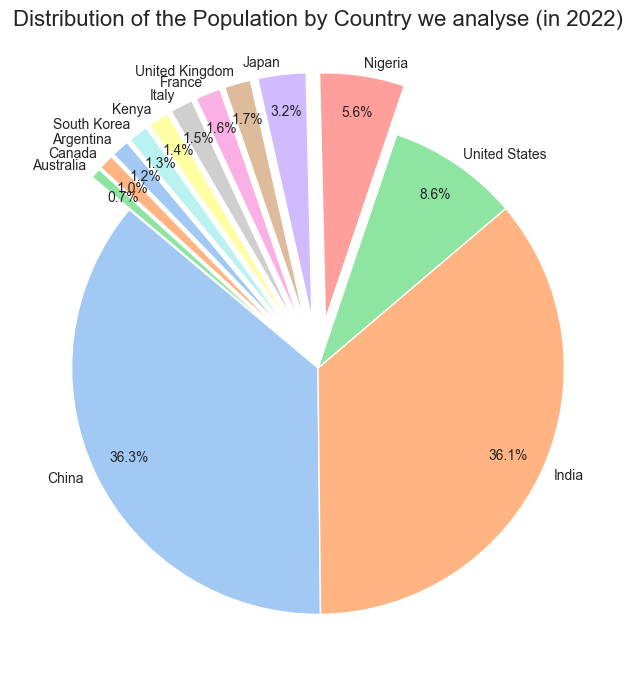

In [41]:
# Check repartition of population for our selected countries
explode = [0 if country in ["China", "India", "United States"] else 0.2 for country in df_countries["countries"]]

plt.figure(figsize=(10, 8))
colors = sns.color_palette("pastel", n_colors=len(df_countries)) 
plt.pie(df_countries["population"], labels=df_countries["countries"], autopct='%1.1f%%',
        startangle=140, explode=explode, colors=colors, labeldistance=1.05, pctdistance=0.85)
plt.title("Distribution of the Population by Country we analyse (in 2022)", fontsize=16, pad=25)
plt.show()